In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression


/Users/kylemix/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/kylemix/anaconda/lib/python3.5/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


### Exercise 5.1:
Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [3]:
dfCon = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',header=None)

In [4]:
dfCon.columns = ['party',
                  'handicapped_infants',
                  'water_proj_cost_share',
                  'adopt_budget_res',
                  'phys_fee_freeze',
                  'el_salv_aid',
                  'relig_grp_schools',
                  'sat_test_ban',
                  'nic_contra_aid',
                  'mx_missile', 
                  'immigration',
                  'synfuels_corp_cut',
                  'edu_spend',
                  'supfund_sue',
                  'crime',
                  'duty_free_exp', 
                  'exp_admin_act_sa']

In [66]:
# function to binarize the votes change '?' to np.nan
# republican coded as 1, democrat coded as 2
def binVotes(x):
    if x == 'n':
        x = 0
    elif x =='y':
        x = 1
    elif x == '?':
        x = np.nan
    else:
        x
    return x

In [6]:
# apply to all cells
dfCon = dfCon.applymap(binVotes)

In [7]:
# replace np.nan with mean of row
dfCon.iloc[:,1:] = dfCon.iloc[:,1:].apply(lambda x: x.fillna(x.mean()),axis = 0) 

In [8]:
dfCon.head()

,party,handicapped_infants,water_proj_cost_share,adopt_budget_res,phys_fee_freeze,el_salv_aid,relig_grp_schools,sat_test_ban,nic_contra_aid,mx_missile,immigration,synfuels_corp_cut,edu_spend,supfund_sue,crime,duty_free_exp,exp_admin_act_sa
0,republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,1,0.362319,1.000000,1,1,0,1.000000
1,republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,0,0.000000,1.000000,1,1,0,0.812689
2,democrat,0.44208,1,1,0.417453,1.000000,1,0,0,0,0,1.000000,0.000000,1,1,0,0.000000
3,democrat,0.00000,1,1,0.000000,0.504762,1,0,0,0,0,1.000000,0.000000,1,0,0,1.000000
4,democrat,1.00000,1,1,0.000000,1.000000,1,0,0,0,0,1.000000,0.423267,1,1,1,1.000000


### exercise 5.2
Split the data into a test and training set.

In [9]:
y = dfCon.iloc[:,0]
X = dfCon.iloc[:,1:]

In [10]:
X.shape,y.shape

((435, 16), (435,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### Exercise 5.3
Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat)
Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k
You can use this to calculate accuracy:
Which k value gives the highest accuracy?

In [12]:
neighbs = range(2,25)
acc = []
for n in neighbs:
    mod = KNeighborsClassifier(n_neighbors=n)
    mod.fit(X_train, y_train)
    knn_y_pred = mod.predict(X_test)
    acc.append(accuracy_score(y_test,knn_y_pred))


In [13]:
ne = zip(neighbs,acc)
KNNScores = pd.DataFrame(list(ne))
KNNScores.columns = ['n_neighbors', 'accuracy_score']

In [14]:
KNNscores = KNNScores.sort_values('accuracy_score', ascending=False)

In [15]:
KNNscores.head(1)

,n_neighbors,accuracy_score
3,5,0.946565


### Exercise 5.4
Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [16]:

LogReg = LogisticRegression()
LogRegFit = LogReg.fit(X_train, y_train)
y_predLogReg = LogRegFit.predict(X_test)
accScore = accuracy_score(y_test,y_predLogReg)
accScore

0.96946564885496178

### Exercise 5.5
Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

In [17]:
plt.style.use('fivethirtyeight')

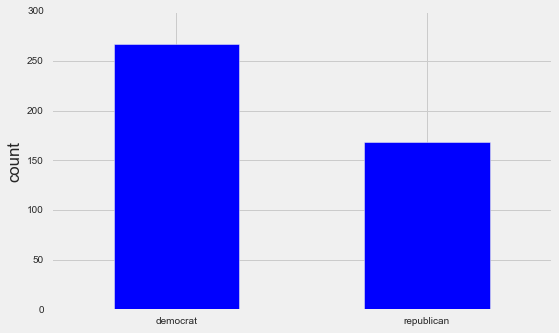

In [18]:
plt.figure(figsize=(8,5))
pd.value_counts(y).plot(kind='bar',rot=0)
plt.ylabel('count');


In [19]:
def demsPred(q):
    return ['democrat' for d in range(0,len(q))]
def repPred(q):
    return ['republican' for d in range(0,len(q))]
    

In [20]:
y_predDem = demsPred(X_train)
scoreDem = accuracy_score(y_train,y_predDem)
y_predRep = repPred(X_train)
scoreRep = accuracy_score(y_train, y_predRep)
print('Republican score: ', scoreRep, '\n','Democrat score: ', scoreDem)

Republican score:  0.401315789474 
 Democrat score:  0.598684210526


###  Exercise 5.6
Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.



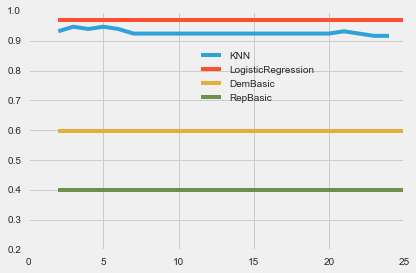

In [21]:
plt.plot(neighbs,acc);
plt.plot([2,25],[accScore,accScore]);
plt.plot([2,25],[scoreDem,scoreDem]);
plt.plot([2,25],[scoreRep,scoreRep]);
plt.ylim(.2);
plt.legend(['KNN','LogisticRegression','DemBasic', 'RepBasic'],loc=[.45,.6])

###  Exercise 5.7
Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [22]:
lr_tsize,lr_trn_err,lr_tst_err  = learning_curve(LogReg,X,y)

In [23]:
tstCVerr = np.mean(lr_tst_err,axis=1)
trnCVerr = np.mean(lr_trn_err,axis=1)

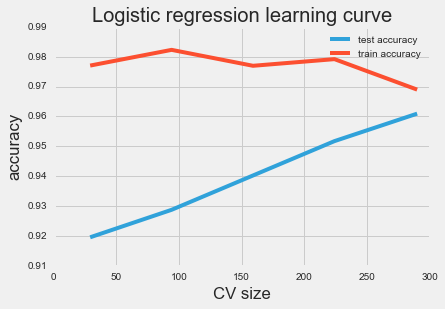

In [24]:
plt.plot(lr_tsize,tstCVerr)
plt.plot(lr_tsize,trnCVerr)
plt.ylabel('accuracy')
plt.xlabel('CV size')
plt.legend(['test accuracy','train accuracy'])
plt.title('Logistic regression learning curve');

In [25]:
kn_tsize,kn_trn_err,kn_tst_err  = learning_curve(KNeighborsClassifier(),X,y)

In [26]:
kntstCVerr = np.mean(kn_tst_err,axis=1)
kntrnCVerr = np.mean(kn_trn_err,axis=1)

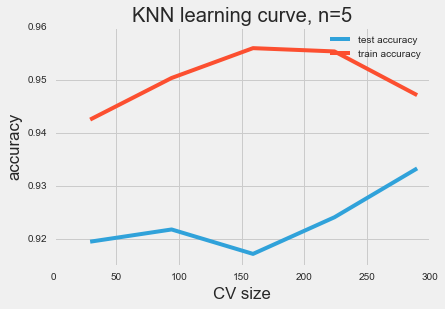

In [27]:
plt.plot(kn_tsize,kntstCVerr)
plt.plot(kn_tsize,kntrnCVerr)
plt.ylabel('accuracy')
plt.xlabel('CV size')
plt.legend(['test accuracy','train accuracy'])
plt.title('KNN learning curve, n=5');

In [263]:
def modelthatSheit(algo,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test):
    mod = algo()
    modFit = mod.fit(X_train, y_train)
    y_pred = modFit.predict(X_test)
    accScore = accuracy_score(y_test,y_pred)
    return {'model':modFit, 'accuracy': accScore}

In [29]:
modelthatSheit(GaussianNB)['accuracy']

0.93893129770992367

In [30]:
modelthatSheit(SVC)['accuracy']

0.96946564885496178

In [31]:
modelthatSheit(DecisionTreeClassifier)['accuracy']

0.95419847328244278

In [32]:
modelthatSheit(RandomForestClassifier)['accuracy']

0.95419847328244278

###  Exercise 5.9
There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

from sklearn.cross_validation import cross_val_score

Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [87]:
def modelthatSheitCV(algo,folds,X=X,y=y):
    mod = algo
    vals = cross_val_score(mod,X,y,scoring='accuracy',cv=folds,n_jobs=-1)
    return {'scores':vals, 'Mean':np.mean(vals),'model':mod}

In [90]:
modelthatSheitCV(LogisticRegression(),5)['Mean']

0.9584839979587374

In [88]:
modelthatSheitCV(SVC(),5)['Mean']

0.95396527423391897

In [58]:
modelthatSheitCV(GaussianNB(),10)['Mean']

0.93977398570421822

In [54]:
modelthatSheitCV(DecisionTreeClassifier(),5)['Mean']

0.94463621783188745

In [57]:
modelthatSheitCV(RandomForestClassifier(n_estimators=100),5)['Mean']

0.96080957935408617

### Exercise 5.10
Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.



In [61]:
dfVote = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',header=None)

In [63]:
dfVote.columns = ['party',
                  'handicapped_infants',
                  'water_proj_cost_share',
                  'adopt_budget_res',
                  'phys_fee_freeze',
                  'el_salv_aid',
                  'relig_grp_schools',
                  'sat_test_ban',
                  'nic_contra_aid',
                  'mx_missile', 
                  'immigration',
                  'synfuels_corp_cut',
                  'edu_spend',
                  'supfund_sue',
                  'crime',
                  'duty_free_exp', 
                  'exp_admin_act_sa']

In [67]:
# binarize votes np.nan ? 
dfVote = dfVote.applymap(binVotes)

In [77]:
# fillNA with mode
dfVote = dfVote.fillna(dfVote.mode().ix[0])

In [85]:
# select handicapped infant as y values and all other fetures expect party as x values

Xv = dfVote.iloc[:,2:]
yv = dfVote.iloc[:,1]

In [91]:
# run CV tests as before
modelthatSheitCV(LogisticRegression(),10,X=Xv,y=yv)['Mean']

0.68735528037853622

In [92]:
modelthatSheitCV(SVC(),10,X=Xv,y=yv)['Mean']

0.69633544749823828

In [93]:
modelthatSheitCV(GaussianNB(),10,X=Xv,y=yv)['Mean']

0.6801570522500755

In [94]:
modelthatSheitCV(DecisionTreeClassifier(),10,X=Xv,y=yv)['Mean']

0.66181163797442877

In [95]:
modelthatSheitCV(RandomForestClassifier(n_estimators=100),10,X=Xv,y=yv)['Mean']

0.63865398167723753

### Exercise 5.11
Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [96]:
movie = pd.read_csv('movie_metadata.csv')

In [103]:
ratings = ['G', 'PG', 'PG-13', 'R']

In [113]:
# get rid of anything but MPAA ratings
dfm = movie[movie.content_rating.isin(ratings)]

In [128]:
dfm = dfm.dropna()

In [132]:
dfm.columns


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [137]:
dfmv =dfm[['content_rating','num_critic_for_reviews','duration',
          'director_facebook_likes',
          'movie_facebook_likes','gross','num_voted_users','cast_total_facebook_likes',
          'facenumber_in_poster','budget','title_year','imdb_score'
         ]]

In [143]:
Xm = dfmv.iloc[:,1:]
ym = dfmv.iloc[:,0]

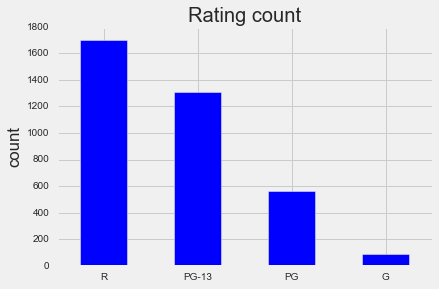

In [152]:

pd.value_counts(ym).plot(kind='bar',rot=0)
plt.ylabel('count')
plt.title('Rating count');

In [154]:
modelthatSheitCV(KNeighborsClassifier(n_neighbors=3),10,Xm,ym)['Mean']

0.25396973652096333

In [157]:
lr = modelthatSheitCV(LogisticRegression(),10,Xm,ym)


In [158]:
lr['Mean']

0.53035830872487844

In [163]:
X_trainm, X_testm, y_trainm, y_testm = train_test_split(Xm,ym, test_size=0.3, random_state=42)

In [166]:
LRmod = LogisticRegression()
LRfit = LRmod.fit(X_trainm,y_trainm)
coef = LRfit.coef_
coef

array([[ -7.50985064e-05,  -8.43868464e-05,  -2.08734885e-04,
         -2.53665939e-05,   1.14893134e-08,  -3.65868317e-06,
         -7.68915016e-05,  -1.43297646e-06,  -5.83860778e-10,
         -1.56302143e-03,  -4.58376447e-06],
       [ -4.65284308e-05,  -4.47690517e-05,   2.67021397e-05,
         -1.16810275e-05,   1.55559864e-08,  -8.74743421e-06,
         -3.59398787e-06,  -6.29836883e-07,  -1.54800876e-10,
         -8.24393143e-04,  -2.45285199e-06],
       [ -1.61277010e-05,  -1.80743885e-05,  -1.82222638e-05,
          5.41832292e-06,   5.07044417e-09,  -1.34385705e-06,
          4.16995293e-06,  -1.02687413e-07,   5.09498182e-11,
         -3.56563540e-04,  -1.26872603e-06],
       [  1.16391886e-08,   6.22223147e-09,   3.74823282e-08,
          2.81263425e-07,  -1.99295746e-08,   6.34980963e-06,
          3.32168534e-07,   1.06248783e-11,   1.24708196e-11,
          9.88470012e-08,   4.22030965e-10]])

In [182]:
def predR(q):
    return ['R' for d in range(0,len(q))]

In [183]:
accuracy_score(y_testm,predR(y_testm))

0.47042766151046406

The baseline for predicting everything as R is .47,  the logistic regression model was only able to improve upon this by 6% so there are gains a plenty to be made here-  normalizing would be my first move.  likes and gross are strong coefficients,so is runtime.

### Exercise 5.12
Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset

What is the average and standard deviation of the age of all of the patients?
What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
What is the earliest year of surgery in this dataset?
What is the most recent year of surgery?
Use logistic regression to predict survival after 5 years. How well does your model do?
What are the coefficients of logistic regression? Which features affect the outcome how?
Draw the learning curve for logistic regression in this case.

In [184]:
bc = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',header=None)

In [185]:
bc.columns = ['age_op','op_year','pos_ax_nodes', 'survival_5yr']

In [208]:
# mean/std age at operation
bc.age_op.describe()[1:3]

mean    52.457516
std     10.803452
Name: age_op, dtype: float64

In [207]:
# mean/std survived less than 5 years
bc[bc.survival_5yr == 2]['age_op'].describe()[1:3]

mean    53.679012
std     10.167137
Name: age_op, dtype: float64

In [206]:
# mean/std survived more than 5 years
bc[bc.survival_5yr == 1]['age_op'].describe()[1:3]

mean    52.017778
std     11.012154
Name: age_op, dtype: float64

In [202]:
# min/max op year
bc.op_year.min(),bc.op_year.max()

(58, 69)

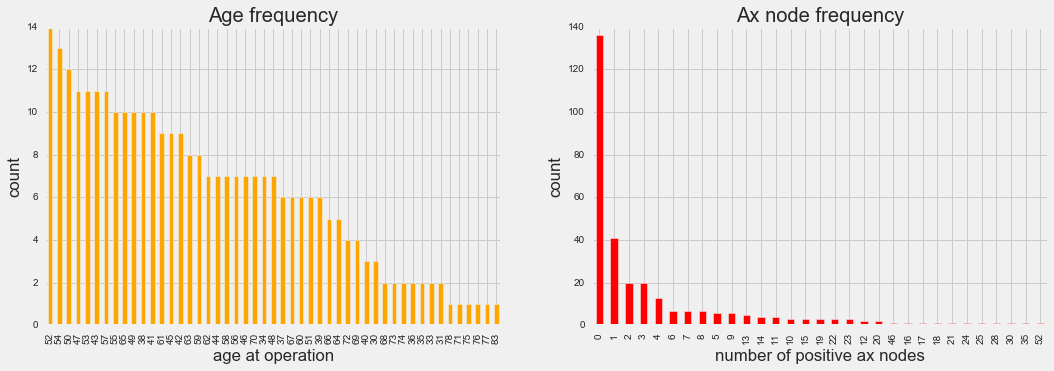

In [237]:
plt.figure(figsize=(16,5))
plt.subplot(121)
pd.value_counts(bc.age_op).plot(kind='bar',color='orange')
plt.xlabel('age at operation')
plt.ylabel('count')
plt.title('Age frequency')
plt.subplot(122)
pd.value_counts(bc.pos_ax_nodes).plot(kind='bar',color='red')
plt.xlabel('number of positive ax nodes')
plt.ylabel('count')
plt.title('Ax node frequency');

In [242]:
bcm =  pd.concat([pd.get_dummies(bc.survival_5yr),bc],axis=1)

In [250]:
# bcm = bcm.drop('survival_5yr', axis=1)
bcm.head()

,1,2,age_op,op_year,pos_ax_nodes
0,1,0,30,64,1
1,1,0,30,62,3
2,1,0,30,65,0
3,1,0,31,59,2
4,1,0,31,65,4


In [274]:
Xbc = bcm.iloc[:,2:]
ybc = bcm.iloc[:,0]

In [277]:
X_trainbc, X_testbc, y_trainbc, y_testbc = train_test_split(Xbc,ybc, test_size=0.3, random_state=42)

In [278]:
bcMod = modelthatSheit(LogisticRegression,X_train=X_trainbc,X_test=X_testbc,y_train=y_trainbc,y_test=y_testbc)

In [279]:
# positive nodes have the strongest effect on not living long post surgery, operations improved
# with the passing of time,  getting breast cancer at an older age wasn't good on your chances for survival
bcMod['model'].coef_

array([[-0.02880521,  0.04752412, -0.09115714]])

In [280]:
bcMod['accuracy']

0.73913043478260865

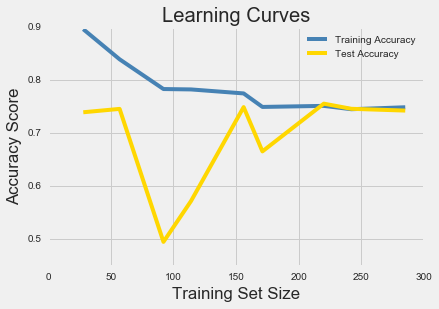

In [292]:
m, train_err, test_err = learning_curve(LogisticRegression(), Xbc, ybc,train_sizes=np.array([ 0.1  ,0.2,  0.325,0.4,   0.55 ,0.6,  0.775,0.85,  1.   ]), cv=15)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err, axis=1)
plt.plot(m,train_cv_err,color='steelblue')
plt.plot(m,test_cv_err, color='gold')
plt.ylabel('Accuracy Score')
plt.xlabel('Training Set Size')
plt.legend(['Training Accuracy','Test Accuracy']);
plt.title('Learning Curves');